# D207

In [1]:
# I need to import the csv file and the libraries necessary for the ANOVA Analysis
import pandas as pd
import numpy as np

md = pd.read_csv('cmd_clean_data.csv')
md.dtypes

Unnamed: 0              int64
Customer_id            object
City                   object
State                   int64
County                 object
Zip                     int64
Population              int64
Area                    int64
Timezone                int64
Children              float64
Age                   float64
Education               int64
Gender                  int64
ReAdmis                 int64
VitD_levels           float64
Doc_visits              int64
Full_meals_eaten        int64
VitD_supp               int64
Soft_drink            float64
Initial_admin           int64
HighBlood               int64
Stroke                  int64
Complication_risk       int64
Overweight            float64
Arthritis               int64
Diabetes                int64
Hyperlipidemia          int64
BackPain                int64
Anxiety               float64
Allergic_rhinitis       int64
Reflux_esophagitis      int64
Asthma                  int64
Services                int64
Initial_da

# A: Research Question
## Research Question or Decision
The data being studied is related to patient readmission rates and possible contributing factors. In order to reduce readmissions, thus reducing the fines to hospitals related to readmissions, we need to clean and analyze the data looking for possible ways to reduce patient readmissions. The research question is: is the length of initial admission correlated to the likelihood that a patient is readmitted within 30 days of discharge.

  

## Benefit to Stakeholders 

The research question presented will give the stakeholders information on a possible factor to reduce patient readmissions, thus reducing the fines that they are facing. If the organization can identify certain factors that are statistically correlated to lower readmission rates, they can create and implement and effective action plan without spending time working on variables that may not have any statistically relevant impact on the organizations goal. 

  

## Required Variables 

The data provided will be reduced to only the columns necessary to perform the analysis. An original backup of the data will be kept for future analysis, or as a rollback if there is an issue while preparing the data for analysis. The column names of relevant columns are listed below, and data types were pulled from the CSV file using pandas library, as shown in Larose (2019), to read the data and dftypes to output the column data type. 

In [2]:
##Create a table with only the relevant columns
AData = md[['Customer_id', 'ReAdmis','Initial_days']]


In [3]:
##Create 2 tables, one that is readmitted and one that is not
ad1 = AData.loc[AData['ReAdmis'] == 0]
ad2 = AData.loc[AData['ReAdmis'] == 1]


In [4]:
from scipy.stats import ttest_ind
from scipy.stats import t



In [5]:
res = ttest_ind(AData[AData.ReAdmis == 1].Initial_days,
                    AData[AData.ReAdmis == 0].Initial_days,
                     equal_var=False)
print(res)
print(f'p-value for single sided test: {res.pvalue / 2: 4f}')

Ttest_indResult(statistic=151.72089774102272, pvalue=0.0)
p-value for single sided test:  0.000000


# B:T-Test
## Rationale and Results
I chose a T-Test due to having only 2 continuous variables to compare against each other's means. For this test the T value was high, thus providing a low p-value under the .05 threshold. This indicates a strong likelihood that the initial days has a statistical correlation with whether a patient is readmitted.  

  

# C:Univariate Statistics 

  

## Identification of Continuus and Categorical Variables for Univariate Statistics 

For my continuous variables I created a histogram of Vitamin-D Levels and Total Charges. A histogram allows to see the ranges our patients are falling into. For vitamin D levels we can see many of our patients are below the 30 ng/mL mark, with very few being above 40. This would be a righ skewed distribution due to the values extending far right from the peak. For total charges we again see nearly all our patients being below $10,000. This would again be a right skewed distrubtion.

For the categorical data we will utilize the obese (yes/no) and Readmission columns. A histogram again will allow us to quickly make observations on the distribution of our data. For readmission we have around 6,000 of our patients not being readmitted within 30 days, and around 6,500 of our patients are considered overweight. All these observations could give us possible additional avenues to go down. 

In [6]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

Text(0, 0.5, 'Number of Patients')

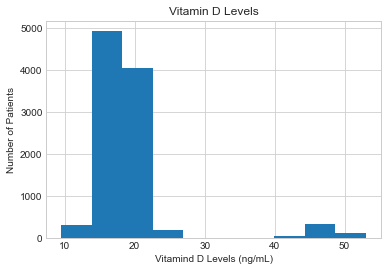

In [7]:
# Histogram of Vitamin D Levels
plt.hist(md.VitD_levels)
plt.title('Vitamin D Levels')
plt.xlabel('Vitamind D Levels (ng/mL)')
plt.ylabel('Number of Patients')

Text(0, 0.5, 'Number of Patients in Range')

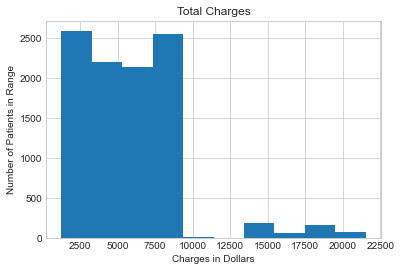

In [8]:
#Total Charges Histogram
plt.hist(md.TotalCharge)
plt.title('Total Charges')
plt.xlabel('Charges in Dollars')
plt.ylabel('Number of Patients in Range')

Text(0, 0.5, 'Number of Patients')

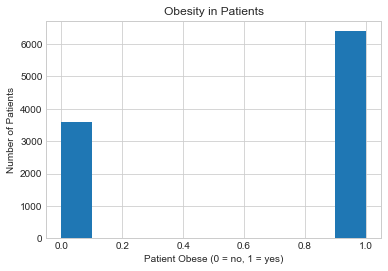

In [9]:
# Obesity Histogram Chart
plt.hist(md.Overweight)
plt.title('Obesity in Patients')
plt.xlabel('Patient Obese (0 = no, 1 = yes)')
plt.ylabel('Number of Patients')

Text(0, 0.5, 'Number of Patients ')

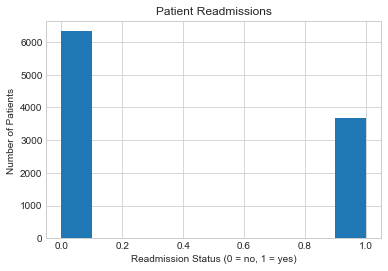

In [10]:
# Readmission Histogram
plt.hist(md.ReAdmis)
plt.title('Patient Readmissions')
plt.xlabel('Readmission Status (0 = no, 1 = yes)')
plt.ylabel('Number of Patients ')

# D: Bivariate Statistics
I will be measuring one continuous variable versus a categorical variable. First, we will examine whether there is a noticeable pattern between length of initial admission(continuous) and readmission of the patient(categorical). Then, we will look at if there is a pattern within vitamin d levels (continuous) and vitamin d supplementation (categorical). For the Readmission vs Length of Admission box plot, the distribution of non-readmitted patients is negatively skewed while readmitted patients is a normal distribution. We can observe the once a patient is above the 50-day mark, they will more than likely be readmitted. For Vitamin D supplementation we can see that you will likely only receive 3 or higher supplementations if you are below the 20 ng/mL mark. We observe normal distributions across all number of supplementations except 4, which is positively skewed.

Text(0.5, 0.98, 'Impact of Length of Admission on Readmission')

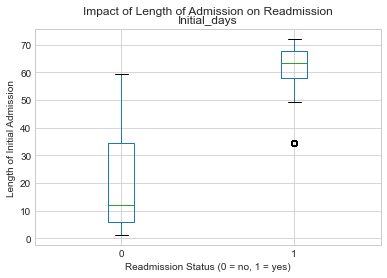

In [11]:
ax = md.boxplot(by='ReAdmis', column='Initial_days')
ax.set_xlabel('Readmission Status (0 = no, 1 = yes)')
ax.set_ylabel('Length of Initial Admission')
plt.suptitle('Impact of Length of Admission on Readmission')

Text(0.5, 0.98, 'Impact of Supplementation on Vitamin D Levels')

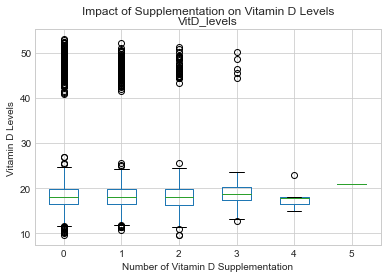

In [12]:
ax = md.boxplot(by='VitD_supp', column='VitD_levels')
ax.set_xlabel('Number of Vitamin D Supplementation')
ax.set_ylabel('Vitamin D Levels')
plt.suptitle('Impact of Supplementation on Vitamin D Levels')

# E:Summary
The results of the hypothesis test, which was the T-test comparing the means of the initial admission days between readmitted and non-readmitted patients, revealed that there is a strong correlation between length of initial admission and likelihood of readmission. While the study is limited to only looking at one possible cause, this is a variable that we should continue investigating. My recommendation based upon this analysis would be to begin examining other factors such as reason for admission in patients that stay admitted over 50 days, and to examine the cause of readmission to see if there is preventative care the hospital can begin implementing for these patients. 

# Annotations
Chantal D. Larose, & Daniel T. Larose. (2019). Data Science Using Python and R. Wiley.

Pandas Development Team. (2008). pandas.DataFrame.drop — pandas 1.3.0 documentation. Pandas.
    https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.
    
Scikit-learn: Machine Learning in Python, Pedregosa et al., JMLR 12, pp. 2825-2830, 2011.

U.S. Department of Health and Human Services. (2021, March 26). Office of Dietary Supplements - Vitamin D. NIH Office of Dietary Supplements. https://ods.od.nih.gov/factsheets/VitaminD-HealthProfessional/#h4. 